# **Detecting Fake News with Natural Language Processing**


**Introduction:**

We get news from a variety of sources throughout the day in our daily lives, but it can be tough to tell which ones are phoney and which are genuine.


**Do you believe everything you read on the internet?**



Every piece of news we consume is false. If you listen to fake news, you're gathering incorrect information from the world, which can have an impact on society because a person's ideas or opinions can shift after eating fake news that the user believes is true.



How can we determine if news is fake or real, given that all news we see in our daily lives is not authentic?



***In this article, we will focus on text-based news and attempt to develop a model that will assist us in determining if a certain piece of news is fake or not***.

# **Libraries were once utilised to solve NLP issues.**


To deal with NLP-based difficulties, a variety of libraries and algorithms are employed. For text cleaning, a regular expression(re) is the most commonly used library. The next-level libraries NLTK and spacy are used to do natural language tasks such as stopword removal, named entity recognition, part of speech tagging, phrase matching, and so on.

`pip install nltk`

In [1]:
# !pip install nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from wordcloud import WordCloud
from collections import Counter
import csv
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
stop = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Read dataset from CSV File**

**We willbe , using pandas `read_csv` to load in the dataframe.**
The data set contains of two csv file one file contains the real news and another file contains fake news. So, we will import both the dataset and stored in dataframe "real_news" and "fake_news" and later on we will concate the both dataset by using pandas  `pd.concat`.


### **Reading real news dataset:**

In [2]:
real_news= pd.read_excel("/content/drive/MyDrive/Fake News Classifier/Real_News.xlsx")
real_news.head()

,Title,News_text,Subject,label
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,1


In [3]:
real_news.shape

(21755, 4)

### **Reading fake news datset:**

In [4]:
fake_news=pd.read_excel("/content/drive/MyDrive/Fake News Classifier/Fake_News.xlsx")
fake_news.head()

,Title,News_text,Subject,label
0,Harry Reid UNLEASHES Anti-Trump Rant On Senat...,Senate Minority Leader Harry Reid has it out f...,News,0
1,BUSTED! MEDIA Caught Red-Handed Trying To Demo...,In their desire to push Hillary Clinton across...,left-news,0
2,Trumpâ€™s Latest Appointee Is A Climate Denie...,There are people currently being turned down f...,News,0
3,[VIDEO] TWO STREET PREACHERS SEVERELY BEATEN B...,Gay pride? Tolerance is a one-way street for t...,politics,0
4,Dem. Rep. Says Steve Bannon Is A â€˜Stone Col...,"Congressman Hakeem Jeffries says that, while h...",News,0


In [5]:
fake_news.shape

(23697, 4)

# **Exploratory data analysis**
Simple Pre-Processing on real news and fake news dataset 

In [6]:
def tokenizeandstopwords(text):
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stop]
    joined_words = ( " ".join(meaningful_words))
    return joined_words

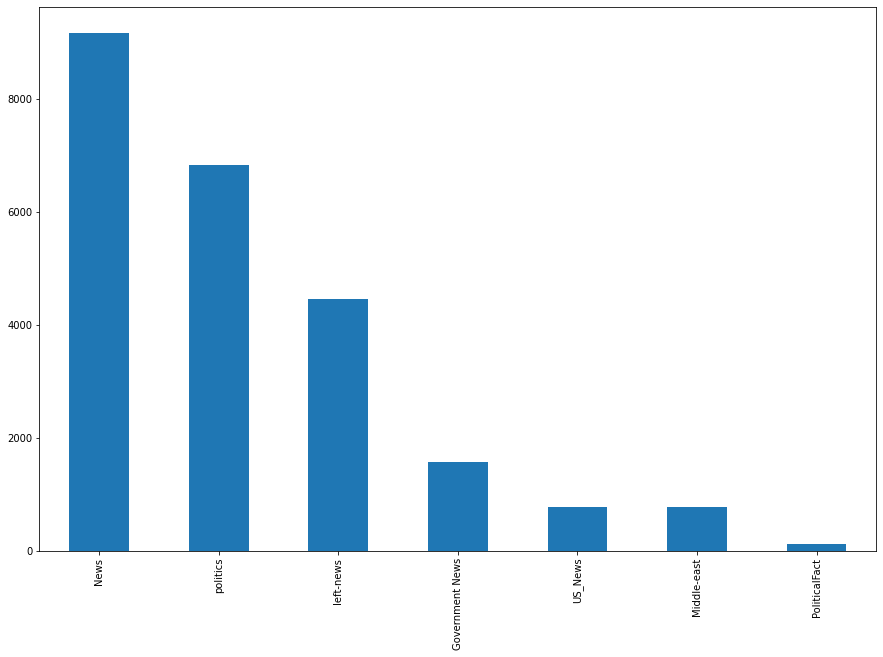

In [7]:
rcParams['figure.figsize'] = 15,10
fake_news.Subject.value_counts().plot(kind="bar")

In [8]:
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
real_news['News_text'] = real_news['News_text'].apply(tokenizeandstopwords)
fake_news['News_text'] = fake_news['News_text'].apply(tokenizeandstopwords)

# Defining the word Cloud function to generate the word cloud

In [10]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 1000,
        height = 800,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

## **World Cloud form real_News Dataset**

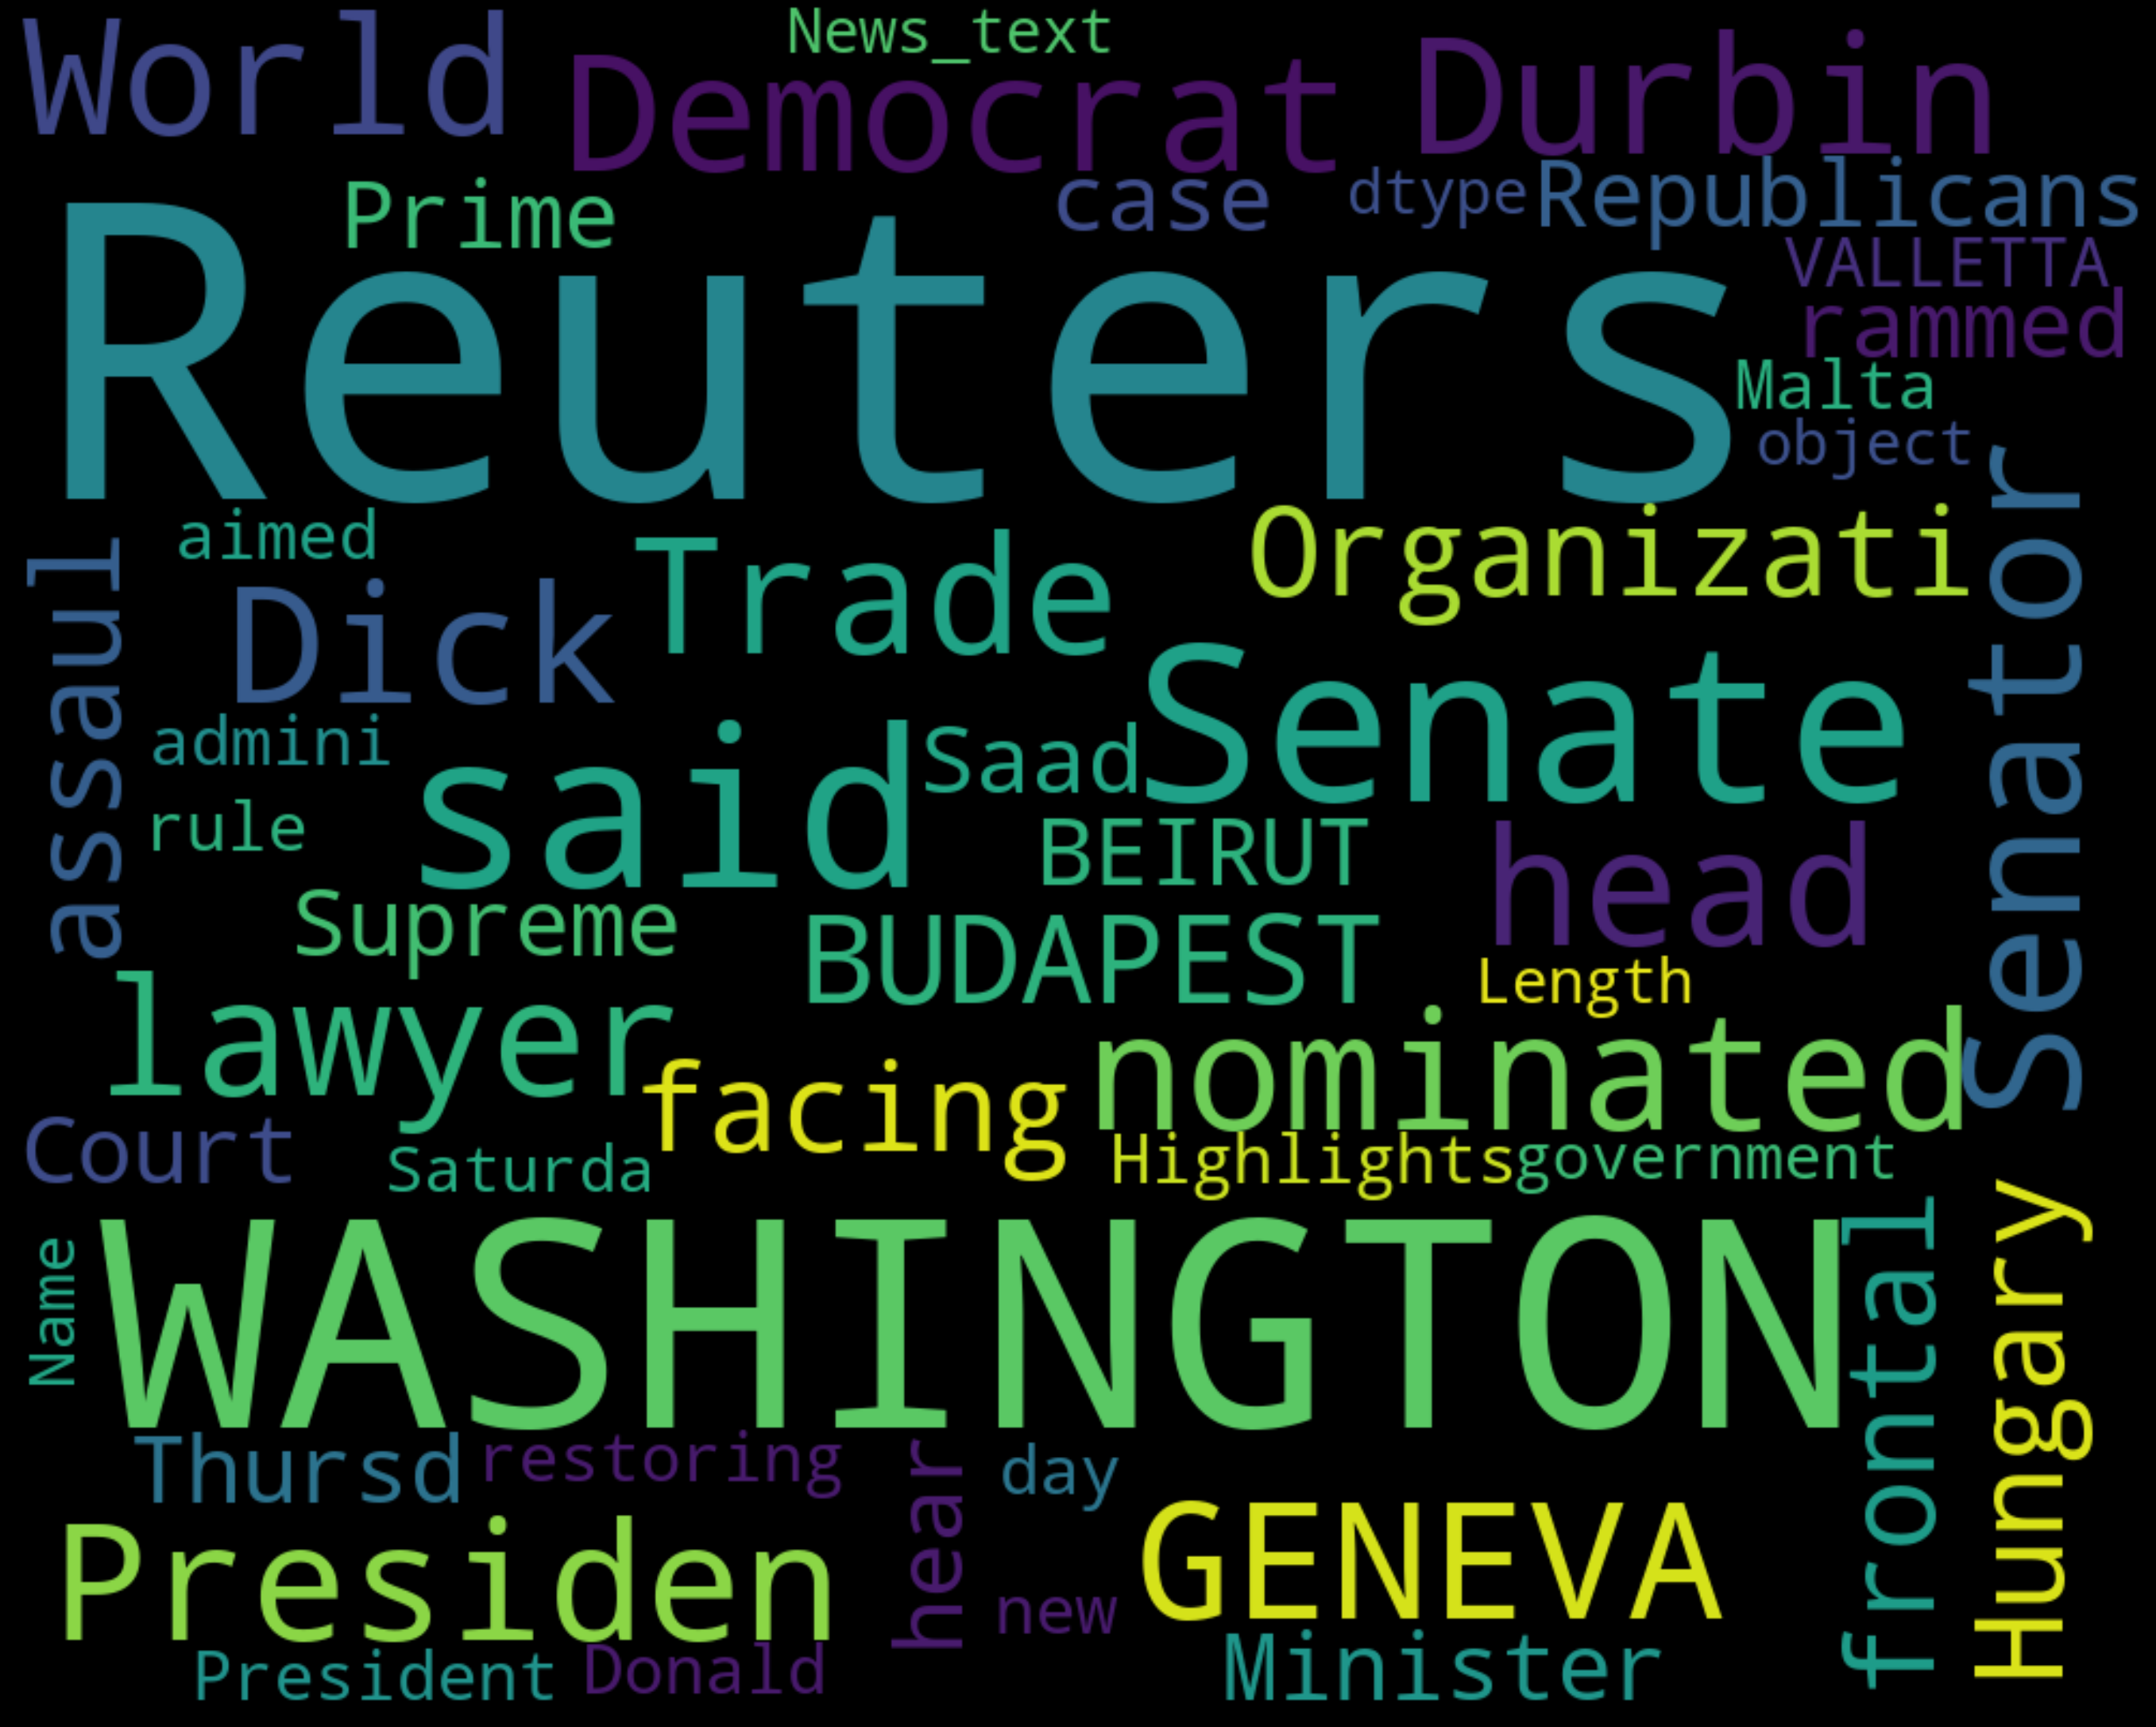

In [11]:
real_news['News_text'] = real_news['News_text'].values
generate_word_cloud(real_news['News_text'])

# **World Cloud form fake_News Dataset**

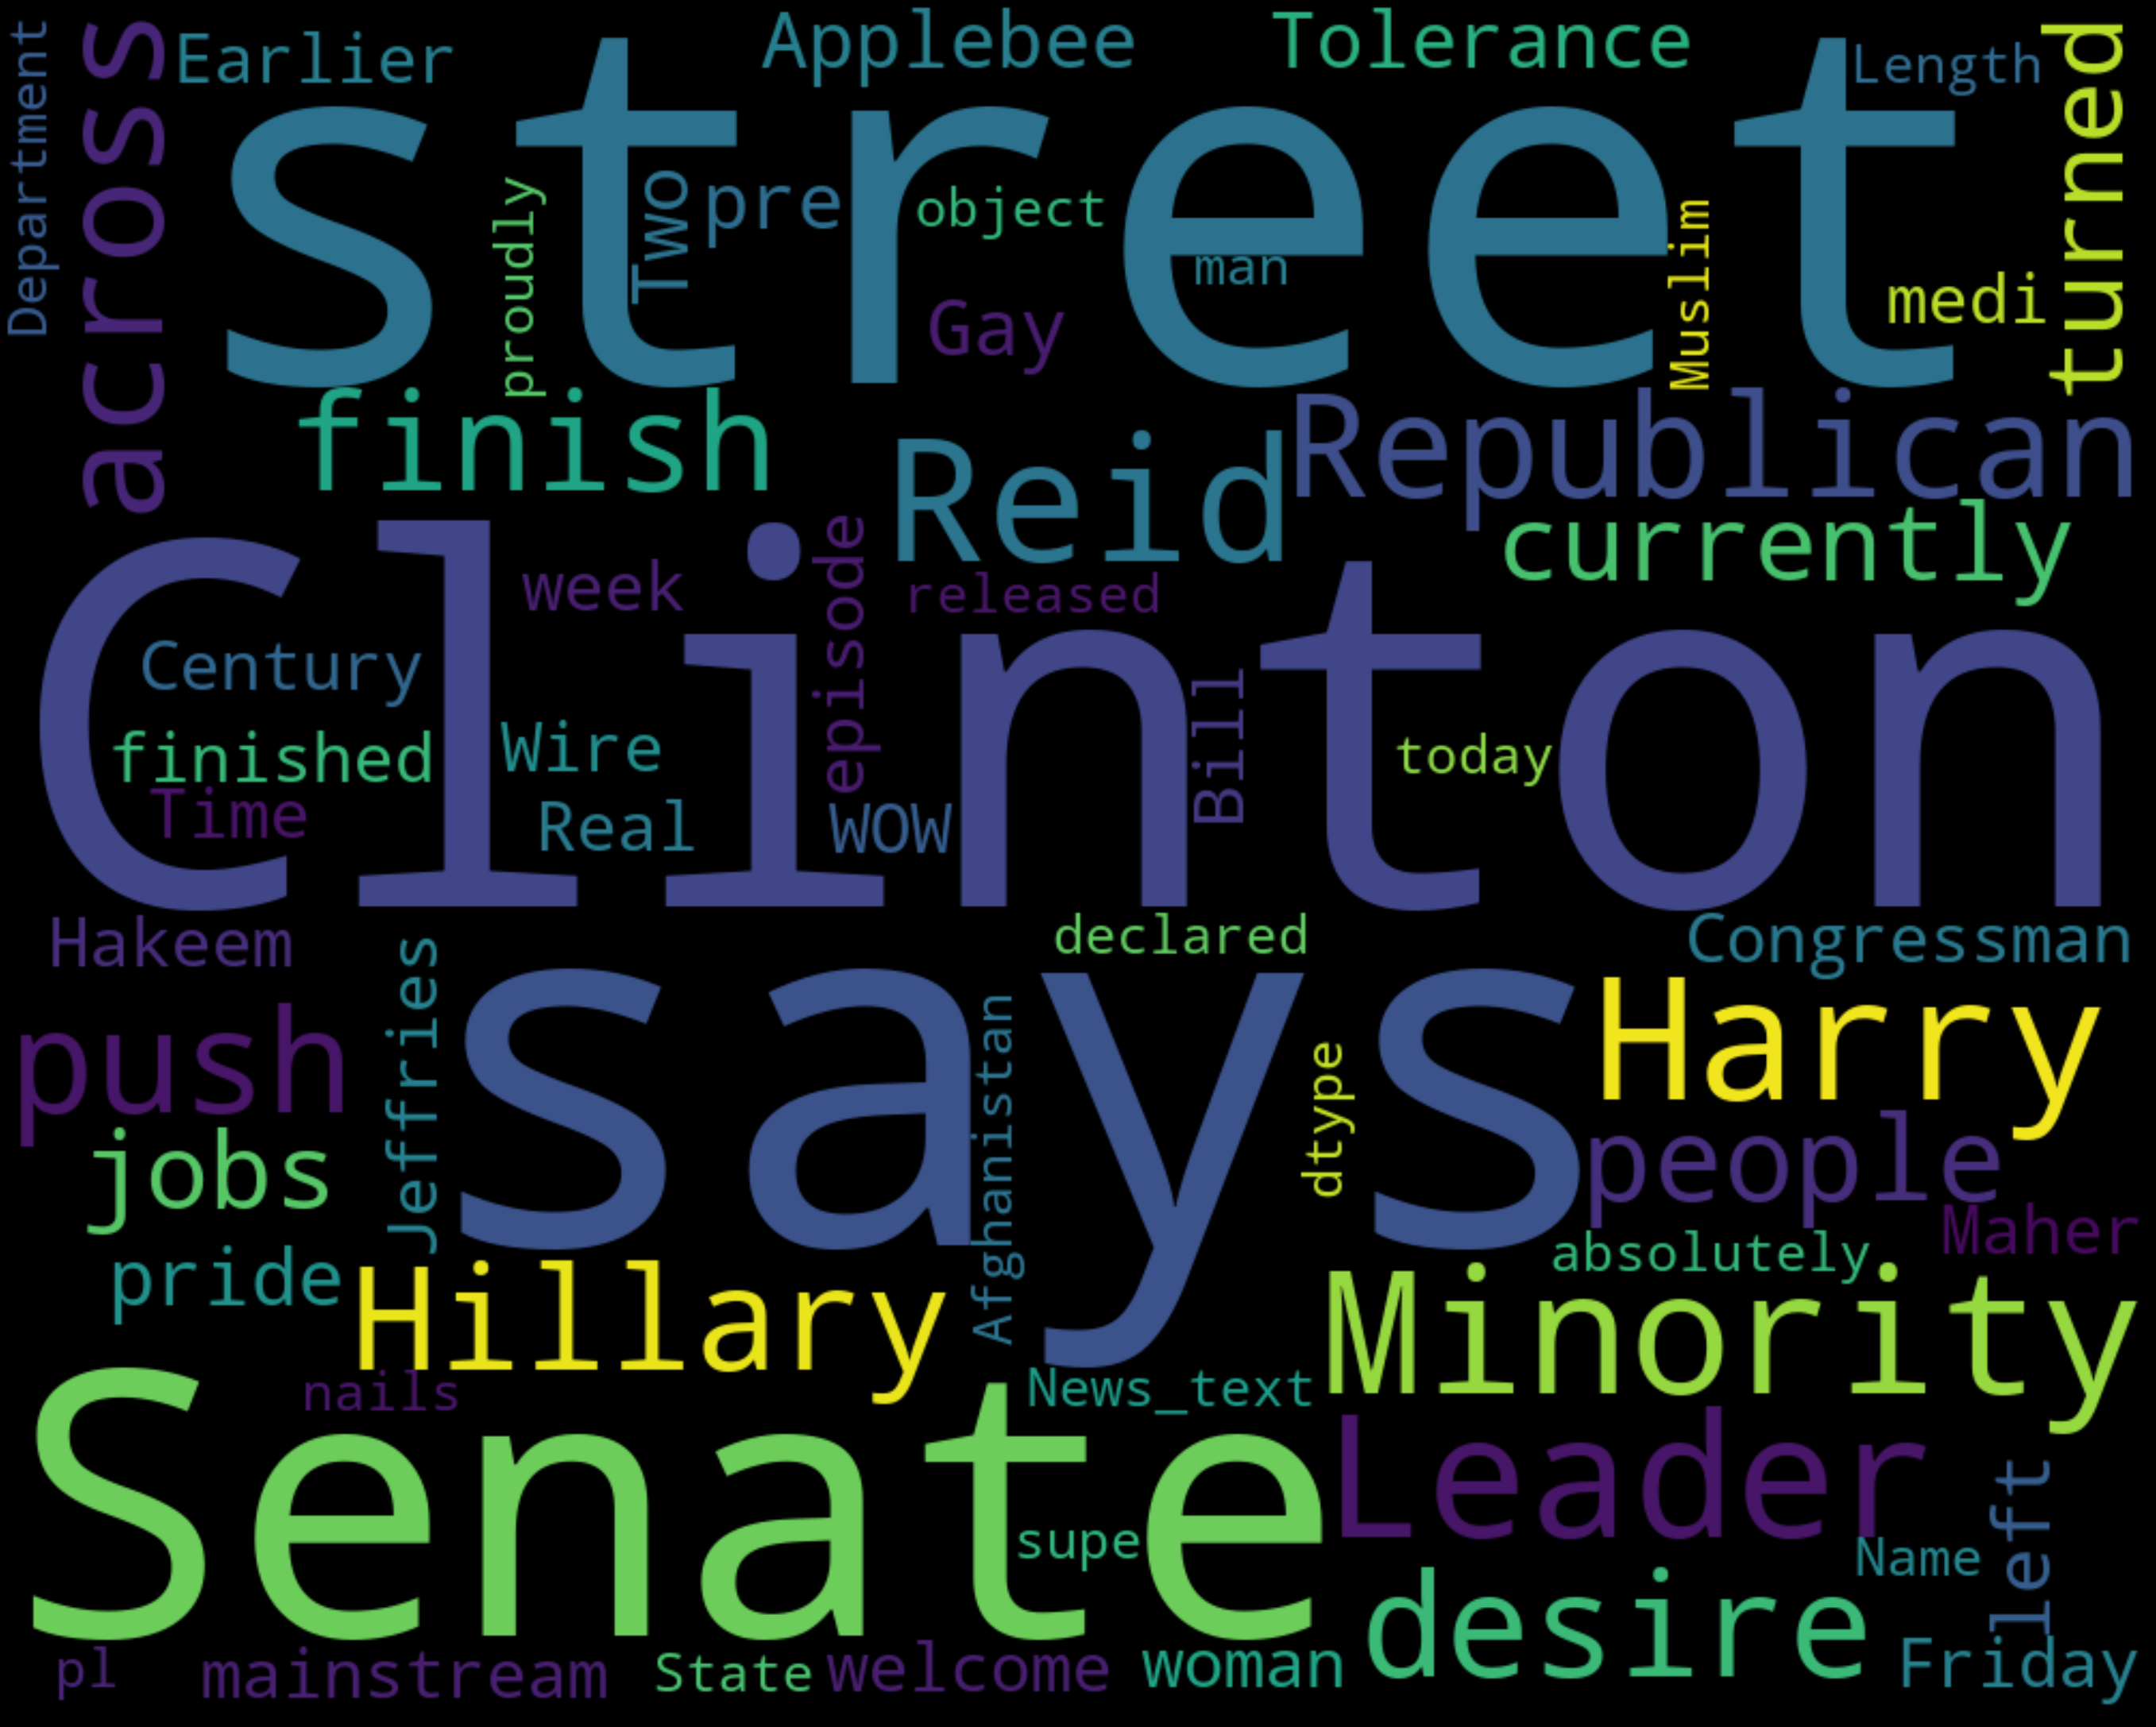

In [12]:
fake_news['News_text'] = fake_news['News_text'].values
generate_word_cloud(fake_news['News_text'])

## **Simple text cleaning**

In [13]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [14]:
true_word = basic_clean(''.join(str(real_news['News_text'].tolist())))

# **N-gram Analysis - Bigram and Trigram**

## **Real News - Bigram**

In [15]:
true_bigrams_series = (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

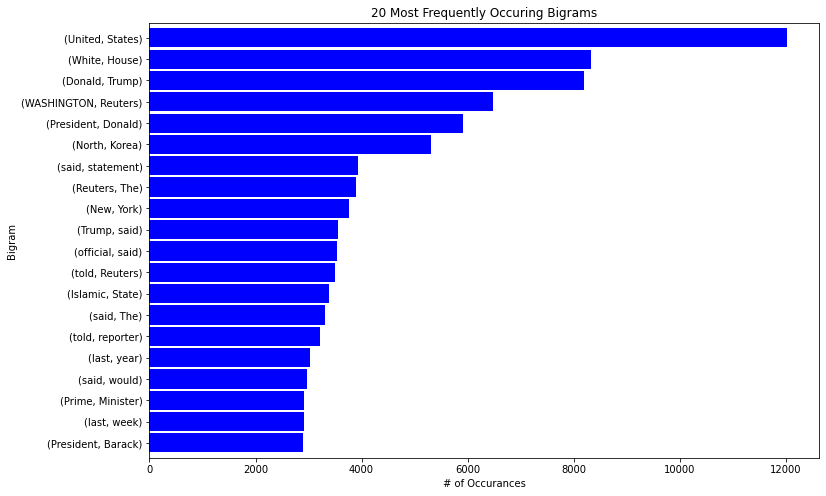

In [16]:
true_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

## **Real News - Trigram**

Text(0.5, 0, '# of Occurances')

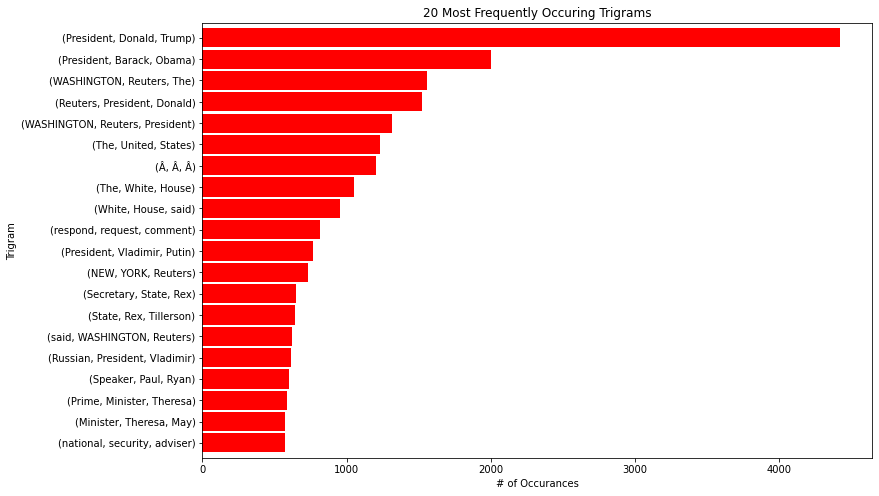

In [17]:
true_trigrams_series = (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:20]
true_trigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

# **N-Gram -False word Analysis**

In [18]:
false_word = basic_clean(''.join(str(fake_news['News_text'].tolist())))

## **False News - Bigram**

In [19]:
flase_bigrams_series = (pd.Series(nltk.ngrams(false_word, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

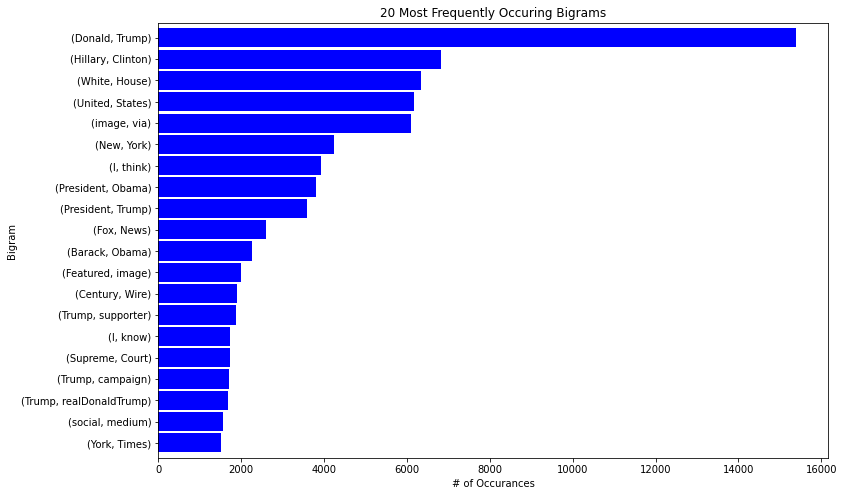

In [20]:
flase_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

## **False News - Trigram**

Text(0.5, 0, '# of Occurances')

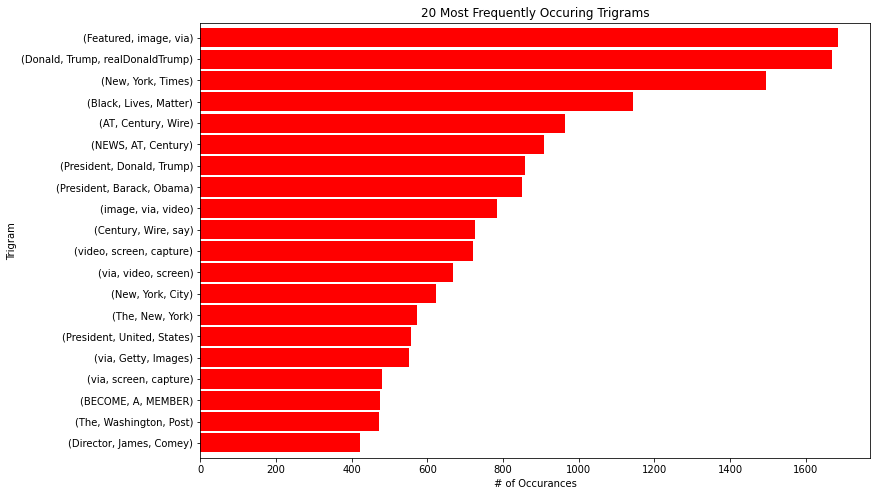

In [21]:
false_trigrams_series = (pd.Series(nltk.ngrams(false_word, 3)).value_counts())[:20]
false_trigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

### **Merging the dataset:**

We have seen real news data and fake news data. We are going to **concat** these two data frame and stored in one data frame called df. So we will use  ```
pd.concat``` 



In [22]:
df= pd.concat([real_news,fake_news],axis=0)
df.head()

,Title,News_text,Subject,label
0,Trump judicial nominee withdraws from consider...,WASHINGTON Reuters A lawyer nominated Presiden...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,Reuters Senator Dick Durbin No Democrat Senate...,politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA Reuters The head World Trade Organizati...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST Reuters Hungary facing frontal assaul...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON Reuters Senate Republicans rammed f...,politicsNews,1


In [23]:
df.shape

(45452, 4)

*So, We have combined these two data frame into one data frame called df.* 

# **Data Cleaning:**
So, the Machine learning algorithms does'nt undersatand the text, we need to convert these words into numbers, so that machine can understand.

Text preprocessing is a technique for cleaning text data and preparing it for use in a model. Text data comprises noise in the form of emotions, punctuation, and text in a different case, among other things. When it comes to Human Language, there are many various ways to communicate the same thing, and this is only the beginning of our problems. Machines cannot understand words; they require numbers, thus we must translate text to numbers in a timely manner.

Steps:
1.   **Tokenization**: Splitting sentences into words, by using NLTK library.
2.   **Removal of Stop-words**: When data analysis needs to be data driven at the word level, the commonly occurring words (stop-words) should be removed. One can either create a long list of stop-words or one can use predefined language specific libraries.
1. **Removal of Punctuations**: All the punctuation marks according to the priorities should be dealt with. For example: “.”, “,”,”?” are important punctuations that should be retained while others need to be removed.
2.   **Converting text into lower case**
1.   **Lemmatization**: Is the process of converting words into meaningful words. 














# **Library for text cleaning:**

First thing first, you load all the necessary libraries:

In [24]:
import nltk # For text cleaning
import re # for regural expression, to remove punctuations
from nltk.corpus import stopwords # for removing stopwords from sentences
from nltk.stem import WordNetLemmatizer   # for lemmatization- to make sentence in proper meaning
from wordcloud import WordCloud  # Word cloud
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt # Matplot lib
% matplotlib inline

In [25]:
#checking for missing values
df.isnull().sum()

Title        0
News_text    0
Subject      0
label        0
dtype: int64

In [26]:
# Now we’ll create a copy of this dataset and also reset its index values.
news=df.copy()
news.reset_index(drop=True)
news.head(10)

,Title,News_text,Subject,label
0,Trump judicial nominee withdraws from consider...,WASHINGTON Reuters A lawyer nominated Presiden...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,Reuters Senator Dick Durbin No Democrat Senate...,politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA Reuters The head World Trade Organizati...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST Reuters Hungary facing frontal assaul...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON Reuters Senate Republicans rammed f...,politicsNews,1
5,Jeb Bush endorses Ted Cruz for Republican nomi...,WASHINGTON Reuters Former candidate Jeb Bush e...,politicsNews,1
6,"Trump, dogged at home, begins longest presiden...",HONOLULU Reuters President Donald Trump arrive...,worldnews,1
7,China's CIC head says Trump to be careful in c...,MELBOURNE Reuters The CEO sovereign wealth fun...,politicsNews,1
8,White House to keep paying Obamacare subsidies...,WASHINGTON Reuters The Trump administration co...,politicsNews,1
9,Comey to testify to Senate panel in public ses...,WASHINGTON Reuters Former FBI Director James C...,politicsNews,1


In [27]:
news.isnull().sum()

Title        0
News_text    0
Subject      0
label        0
dtype: int64

In [28]:
news.dropna()

,Title,News_text,Subject,label
0,Trump judicial nominee withdraws from consider...,WASHINGTON Reuters A lawyer nominated Presiden...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,Reuters Senator Dick Durbin No Democrat Senate...,politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA Reuters The head World Trade Organizati...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST Reuters Hungary facing frontal assaul...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON Reuters Senate Republicans rammed f...,politicsNews,1
...,...,...,...,...
23692,CLOAKED ORDER: Whoâ€™s Really Behind â€˜New Au...,Century Wire says Earlier week mainstream medi...,Middle-east,0
23693,Bill Maher Gets His Swagger On Over Liberal C...,Bill Maher finished Friday episode Real Time a...,News,0
23694,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NA...,WOW This woman absolutely nails,politics,0
23695,"State Dept. Releases 7,000 Clinton E-mails But...",The State Department released Clinton today pl...,politics,0


In [29]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Punctuation Removal:** 
In this step, all the punctuations from the text are removed. string library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In [30]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
news['News_text']= news['News_text'].apply(lambda x:remove_punctuation(x))


In [32]:
#remove punctuation
news['News_text'] = news['News_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
news.head()

,Title,News_text,Subject,label
0,Trump judicial nominee withdraws from consider...,WASHINGTON Reuters A lawyer nominated Presiden...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,Reuters Senator Dick Durbin No Democrat Senate...,politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA Reuters The head World Trade Organizati...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST Reuters Hungary facing frontal assaul...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON Reuters Senate Republicans rammed f...,politicsNews,1


## **Remove any words or digits that contain digits.**

It is not uncommon for words and numerals to be written together in a text, posing a barrier for machines to grasp. As a result, we must eliminate words and digits that are mixed, such as game57 or game5ts7. Because this type of word is difficult to digest, it is preferable to eliminate it or replace it with an empty string. For this, we employ regular expressions.

In [33]:
#remove words and digits
news['News_text'] = news['News_text'].apply(lambda x: re.sub('W*dw*','',x))
news.head()

,Title,News_text,Subject,label
0,Trump judicial nominee withdraws from consider...,WASHINGTON Reuters A lawyer nominate Presient ...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,Reuters Senator Dick Durbin No Democrat Senate...,politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA Reuters The hea Worl Trae Organization ...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST Reuters Hungary facing frontal assaul...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON Reuters Senate Republicans ramme fo...,politicsNews,1


In [34]:
news['News_text']= news['News_text'].replace('[^a-zA-z]',' ',regex=True)
news['News_text'].head(1)

0    WASHINGTON Reuters A lawyer nominate Presient ...
Name: News_text, dtype: object

## **Lowering the text:**

- It is one of the most common preprocessing steps where the text is converted into the same case preferably lower case. But it is not necessary to do this step every time you are working on an NLP problem as for some problems lower casing can lead to loss of information.

- For example, if in any project we are dealing with the emotions of a person, then the words written in upper cases can be a sign of frustration or excitement.

In [35]:
news['News_text']= news['News_text'].apply(lambda x: x.lower())
news.head()


,Title,News_text,Subject,label
0,Trump judicial nominee withdraws from consider...,washington reuters a lawyer nominate presient ...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,reuters senator dick durbin no democrat senate...,politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",geneva reuters the hea worl trae organization ...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,budapest reuters hungary facing frontal assaul...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,washington reuters senate republicans ramme fo...,politicsNews,1


## **Tokenization:**

In this step, the text is split into smaller units. We can use either sentence tokenization or word tokenization based on our problem statement.

In [36]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
news['News_text']= news['News_text'].apply(lambda x: tokenization(x))
news.head()

,Title,News_text,Subject,label
0,Trump judicial nominee withdraws from consider...,[washington reuters a lawyer nominate presient...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,[reuters senator dick durbin no democrat senat...,politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",[geneva reuters the hea worl trae organization...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,[budapest reuters hungary facing frontal assau...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,[washington reuters senate republicans ramme f...,politicsNews,1


## **Stop word removal:** 
- Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.

- NLTK library consists of a list of words that are considered stopwords for the English language. Some of them are : [i, me, my, myself, we, our, ours, ourselves, you, you’re, you’ve, you’ll, you’d, your, yours, yourself, yourselves, he, most, other, some, such, no, nor, not, only, own, same, so, then, too, very, s, t, can, will, just, don, don’t, should, should’ve, now, d, ll, m, o, re, ve, y, ain, aren’t, could, couldn’t, didn’t, didn’t]

In [37]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [38]:


#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output


In [39]:
#applying the function
news['News_text']= news['News_text'].apply(lambda x:remove_stopwords(x))

news.head(1)

,Title,News_text,Subject,label
0,Trump judicial nominee withdraws from consider...,[washington reuters a lawyer nominate presient...,politicsNews,1


## **Lemmatization:** 
- It stems the word but makes sure that it does not lose its meaning.  Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.

In [40]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [41]:
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
news['News_text']=news['News_text'].apply(lambda x:lemmatizer(x))

In [42]:
news.head()

,Title,News_text,Subject,label
0,Trump judicial nominee withdraws from consider...,[washington reuters a lawyer nominate presient...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,[reuters senator dick durbin no democrat senat...,politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",[geneva reuters the hea worl trae organization...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,[budapest reuters hungary facing frontal assau...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,[washington reuters senate republicans ramme f...,politicsNews,1


In [43]:
news['News_text']=news['News_text'].apply(str)

# **Creating Independent & dependent varibales**

In [44]:
#Independent varibale
X= news['News_text']

#Dependent variable
y= news['label']


# **Generating Word Cloud on full data**
The magnitude of each word represents its frequency or relevance in a word cloud, which is a data visualisation tool for visualising text data. A word cloud can be used to emphasise important textual data points. Data from social networking websites is frequently analysed using word clouds.

Matplotlib, pandas, and wordcloud are required modules for creating a word cloud in Python. Run the following commands to install these packages:

```
pip install matplotlib
pip install pandas
pip install wordcloud
```



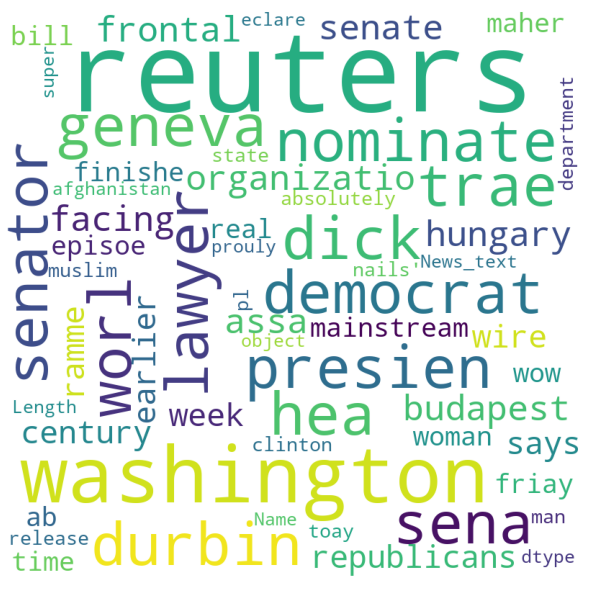

In [45]:
# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate (str(X))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

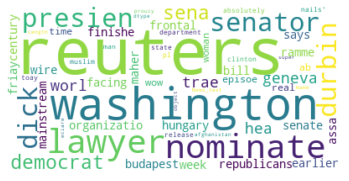

In [46]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(X))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


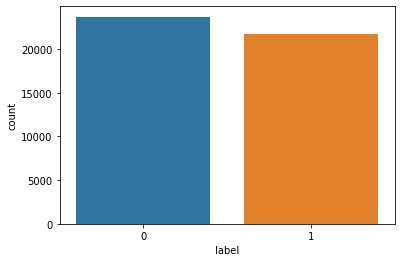

In [47]:
import seaborn as sns
sns.countplot(y)

# **Full Dataset Analysis**

In [48]:
words = basic_clean(''.join(str(news['News_text'].tolist())))

## Full Data - Bigram

In [49]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

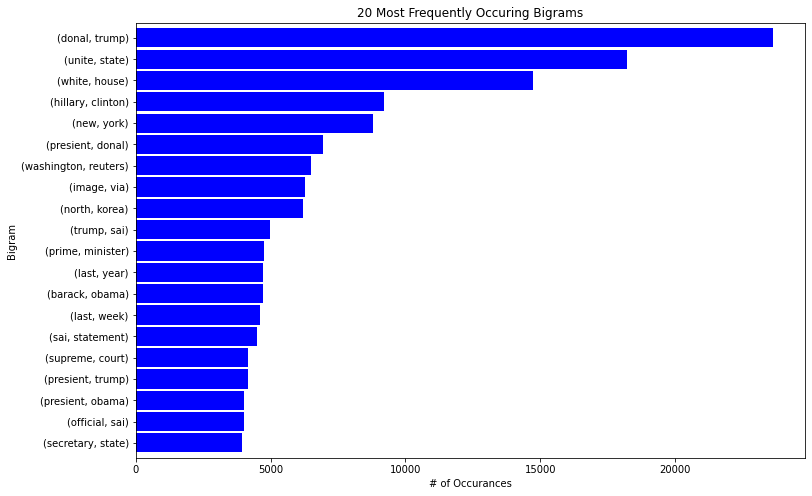

In [50]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

### **Full Data - Trigram**

In [51]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

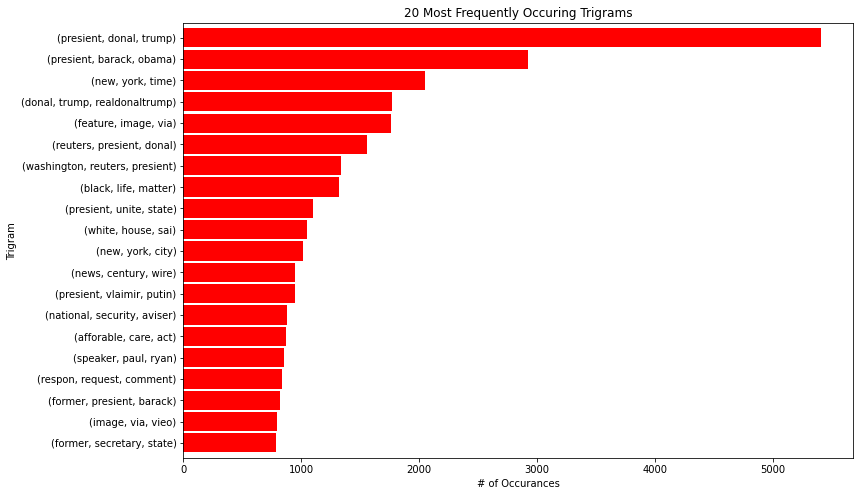

In [52]:
trigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

## **Bag of Words**
The term "bag of words" refers to a text representation that describes the presence of words within text data. This is based on the assumption that two similar text fields will include similar types of words and so have a similar bag of words. Furthermore, we can deduce something about the document's significance solely from the text.

Sklearn provides a separate function for it to be implemented, as illustrated below:

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=5000, lowercase=True, ngram_range=(1,3),analyzer = "word")
X= bow.fit_transform(news['News_text']).toarray()


## **N-Grams as Characteristics**
N-Grams are a collection of N-words put together. When compared to words (Unigrams), N-grams (N > 1) are often more informative. Furthermore, bigrams (N = 2) are regarded as the most important of all the others. The code below creates a bigram of text.
## **Split the Data:**
The most important stage in machine learning is splitting the data. We use the trainset to train our model and the testing set to test our data. Using Scikit learns train_test_split function, we split our data into train and test.

In [54]:
#Dataset is now split into train and test. 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## **Preparing data for model building:**

In [55]:
#The array is converted into dataframe.
df_news=pd.DataFrame(X_train,columns=bow.get_feature_names_out())
df_news.head()

,aam,abanon,abanone,abc,abc news,abe,abein,ability,able,abortion,abortions,about,abroa,absolute,absolutely,abu,abuse,abuses,acaemic,accept,acceptable,accepte,accepting,access,accor,accoring,account,accountability,accountable,accounts,accurate,accusation,accusations,accuse,accusing,achieve,acknowlege,acr,across,across country,...,writer,writes,writing,written,wrong,wrongoing,wrote,xi,xi jinping,yeah,year,year ago,year the,years,years ago,years ol,yemen,yes,yesteray,yet,yet another,york,york city,york reuters,york times,you,you know,young,young people,younger,your,youth,youtube,zealan,zero,zika,zimbabwe,zone,zones,zuma
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Building Model:**
### **Naive Bayes Multinomial:**
When it’s in discrete form, it’s useful for classification. It comes in handy when working with text. Each text will be turned into a word count vector. It can deal with negative numbers.

It’s pre-programmed in the Scikit Learn Library. We can then import that class into our project and build a Multinomial Naive Bayes Class object.

- Use our vectorized train data to train the classifier.
- Once the classifier has been fitted to the training set, we may use the  predict technique to forecast the test set outcome.

In [56]:
# Building the model
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)
#predicting 
y_pred=nb.predict(X_test)

# **Classification Metrics**
To see how well our model works, we utilize several metrics to see how accurate it is. In Scikit-learn, there are a variety of categorization metrics to choose from.


**Precision, Recall, F1-Score, Confusion Matrix, Accuracy Score**

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy= accuracy_score(y_test,y_pred)
print(accuracy)
report= classification_report(y_test,y_pred)
print(report)

[[4552  244]
 [ 197 4098]]
0.951490485095149
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4796
           1       0.94      0.95      0.95      4295

    accuracy                           0.95      9091
   macro avg       0.95      0.95      0.95      9091
weighted avg       0.95      0.95      0.95      9091



***As you can see, our Precision, Recall, and F1 Score are all excellent. As a result, we can confidently state that our model performs admirably on unobserved data. The accuracy score on the Test Dataset is 95%, which is excellent.***

# **Now we will build the ANN Model!**
- **Define your model:** create a Sequential model and add layers.
- **Compile your model:** specify loss function and optimizers and call the `.compile()` function.
- **Fit your model:** train the model on data by calling the `.fit() `function.
- **Make predictions:** use the model to generate predictions on new data by calling functions such as `.evaluate()` or `.predict()`

In [58]:
#Importing necessary Libraries
import tensorflow as tf
import keras
from keras.models import Sequential  # for all deep learning neural network
from keras.layers import Dense #for hidden layer 
from keras.layers import LeakyReLU,PReLU,ELU # for Activation function 
from keras. layers import Dropout  # to avoid overfittin---> if neural network is too deep we usually used this

### **Creating input layer/Hidden layer/Output layer**
- The Dense function in Keras constructs a fully connected neural network layer, automatically initializing the weights as biases.
- **Units:**The first argument, represents the number of nodes in this layer. several neurons that will be present in the respective layer.
- ***Activation:*** Specify which activation function to be used. The activation function of a logistic regression model is the logistic function or called the sigmoid
- ***Input_dim***= No fo features in the training

In [59]:
# Initialising the ANN
classifier= Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=5000))
# Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30006     
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 30,055
Trainable params: 30,055
Non-trainable params: 0
_________________________________________________________________


In [60]:
# compiling ANN
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#fitting the ANN to the training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=100,epochs=3)

Epoch 1/3
244/244 [==============================] - 2s 7ms/step - loss: 0.1877 - accuracy: 0.9564 - val_loss: 0.0940 - val_accuracy: 0.9841
Epoch 2/3
244/244 [==============================] - 1s 6ms/step - loss: 0.0701 - accuracy: 0.9895 - val_loss: 0.0830 - val_accuracy: 0.9841
Epoch 3/3
244/244 [==============================] - 2s 7ms/step - loss: 0.0499 - accuracy: 0.9931 - val_loss: 0.0696 - val_accuracy: 0.9869


In [61]:
# predicting the model
y_pred= classifier.predict(X_test)
y_pred= (y_pred>0.5)
y_pred

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [62]:
cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy of the model is',accuracy)
cl_report = classification_report(y_test,y_pred)
print(cl_report)

[[4723   73]
 [  62 4233]]
The accuracy of the model is 0.985150148498515
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4796
           1       0.98      0.99      0.98      4295

    accuracy                           0.99      9091
   macro avg       0.99      0.99      0.99      9091
weighted avg       0.99      0.99      0.99      9091



**we can confidently state that our model performs admirably on unobserved data. When we are using Neural Network, The accuracy score on the Test Dataset is 98.5%, which is excellent, Here we are getting good accuracy with machine learning model (Naive Bayes classifier) which is ~ 95 % accuracy**

# **Term Frequency – Inverse Document Frequency (TF-IDF)**
We don’t have to calculate TF and IDF every time beforehand and then multiply it to obtain TF-IDF. Instead, sklearn has a separate function to directly obtain it:
### **Term Frequency**
The ratio of the number of words in a sentence to the length of the sentence is known as term frequency.

As a result, we can define term frequency as follows:

***TF = (Number of times term T appears in a particular row) /  (number of terms in that row)***

### **Inverse Document Frequency**
Inverse document frequency (IDF) is based on the idea that a word isn't really useful if it appears in every document.

As a result, the log of the ratio of the total number of rows to the number of rows in which that word appears is the IDF of each word.

**IDF = log(N/n), where N is the total number of rows and n denotes the number of rows containing the word.**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,3))
X = tfidf.fit_transform(news['News_text']).toarray()

In [ ]:
#Dataset is now split into train and test. 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#The array is converted into dataframe.
df_news=pd.DataFrame(X_train,columns=bow.get_feature_names_out())
df_news.head()

In [ ]:
# Building the model
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)
#predicting 
y_pred=nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy= accuracy_score(y_test,y_pred)
print(accuracy)
report= classification_report(y_test,y_pred)
print(report)

# **Conclusion:**

We learned how to use Python to detect fake news today. We used a Fake and real News dataset to fit our model, which included a Text cleaning function, Bag of word, and an initialized Multinomial Naive Bayes Classifier. We were able to get a magnitude accuracy of ~ 95 percent and with Neural Network gettting accuracy 98%. With TF-IDF we able to get accuracy ~93%,with Naive Bayes classifier.

I hope you had a good time working on this project